<a href="https://colab.research.google.com/github/iMan0405/Portfolio_DT_vs_AI/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation (Ma'lumotlar Tahlili va Vizualizatsiya) loyihasi

## Kutubxonalarni yuklab olamiz

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

## Ma'lumotlarni o'rganamiz

### faylni "df" o'zgaruvchisiga yuklab olamiz

In [32]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### jadval qator va ustunlar sonini ko'ramiz

In [33]:
df.shape

(200, 5)

### jadval bo'yicha ma'lumotlarni tahlil qilamiz

In [34]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### jadval bo'yicha ma'lumotlarni tahlil qilamiz

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### jadvalda to'ldirilmagan yacheykalar holatini tahlil qilamiz

In [36]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Korrilatsiyalarni ko'ramiz

In [37]:
df.corrwith(df['Age'])

CustomerID               -0.026763
Age                       1.000000
Annual Income (k$)       -0.012398
Spending Score (1-100)   -0.327227
dtype: float64

In [38]:
df.corrwith(df['Annual Income (k$)'])

CustomerID                0.977548
Age                      -0.012398
Annual Income (k$)        1.000000
Spending Score (1-100)    0.009903
dtype: float64

In [39]:
df.corrwith(df['Spending Score (1-100)'])

CustomerID                0.013835
Age                      -0.327227
Annual Income (k$)        0.009903
Spending Score (1-100)    1.000000
dtype: float64

## Ma'lumotlarni vizualizatsiya qilamiz

In [40]:
plt.style.use('fivethirtyeight')

### Histogramma

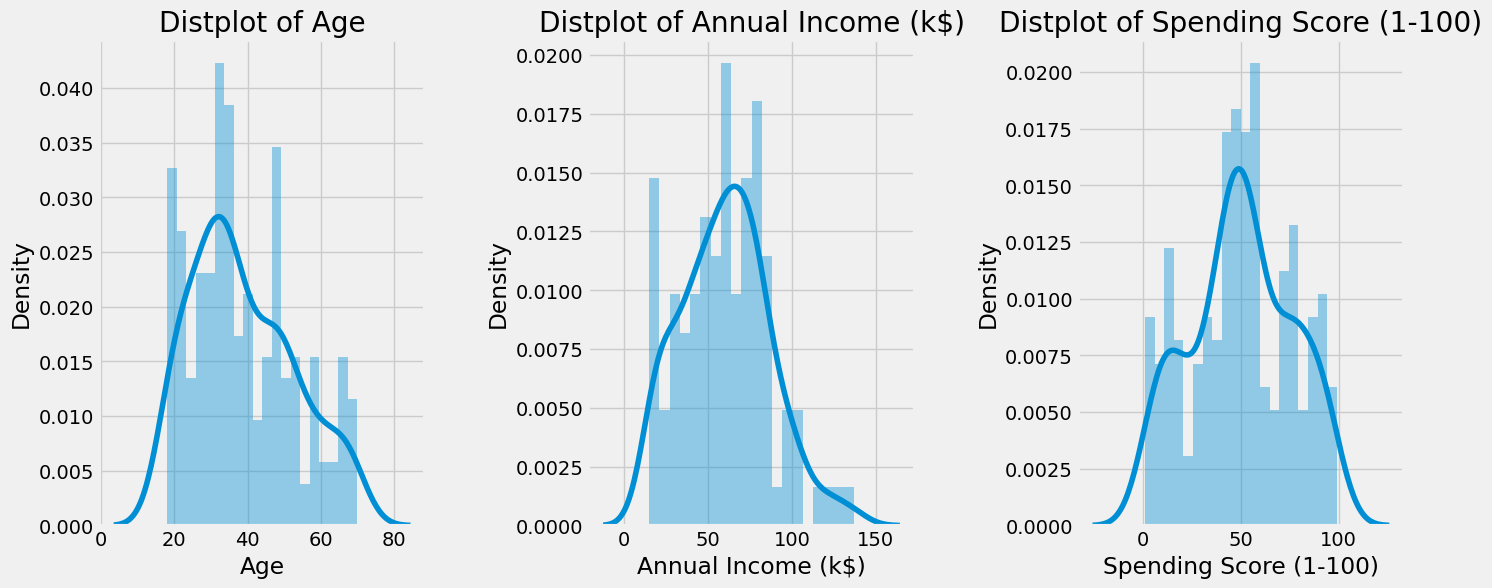

In [41]:
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(df[x], bins = 20)
  plt.title(f'Distplot of {x}')
plt.show()

### Jinslar bo'yicha tahlil

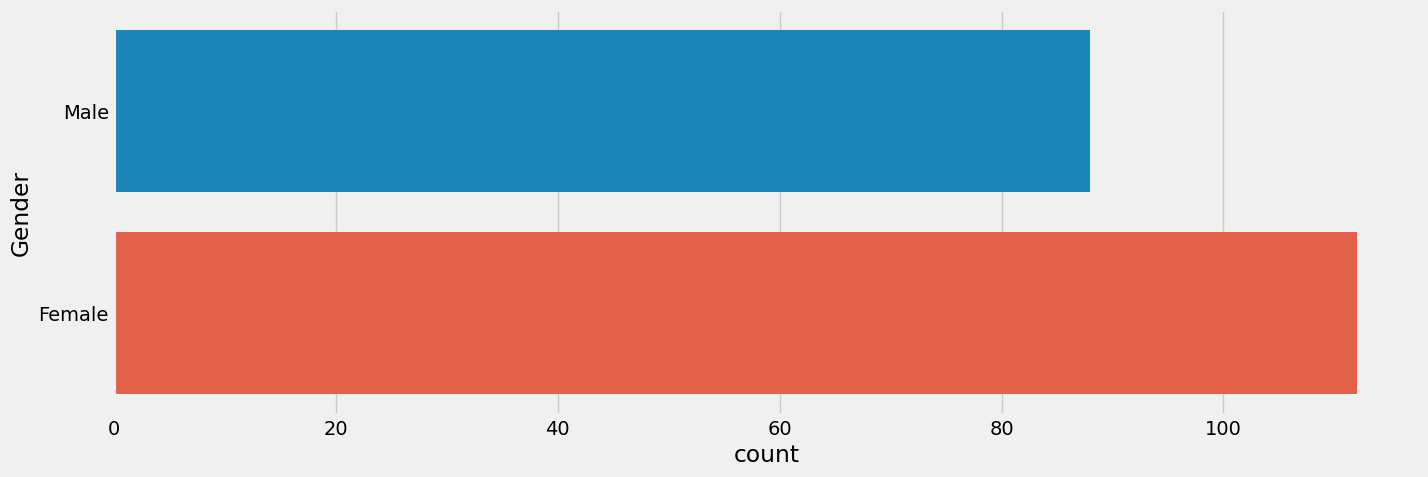

In [42]:
plt.figure(1, figsize = (15, 5))
sns.countplot(y = 'Gender', data = df)
plt.show()

### Yosh, yillik daromad va xarajat ballari o'rtasidagi munosabatlarni vizual holatda o'rganamiz

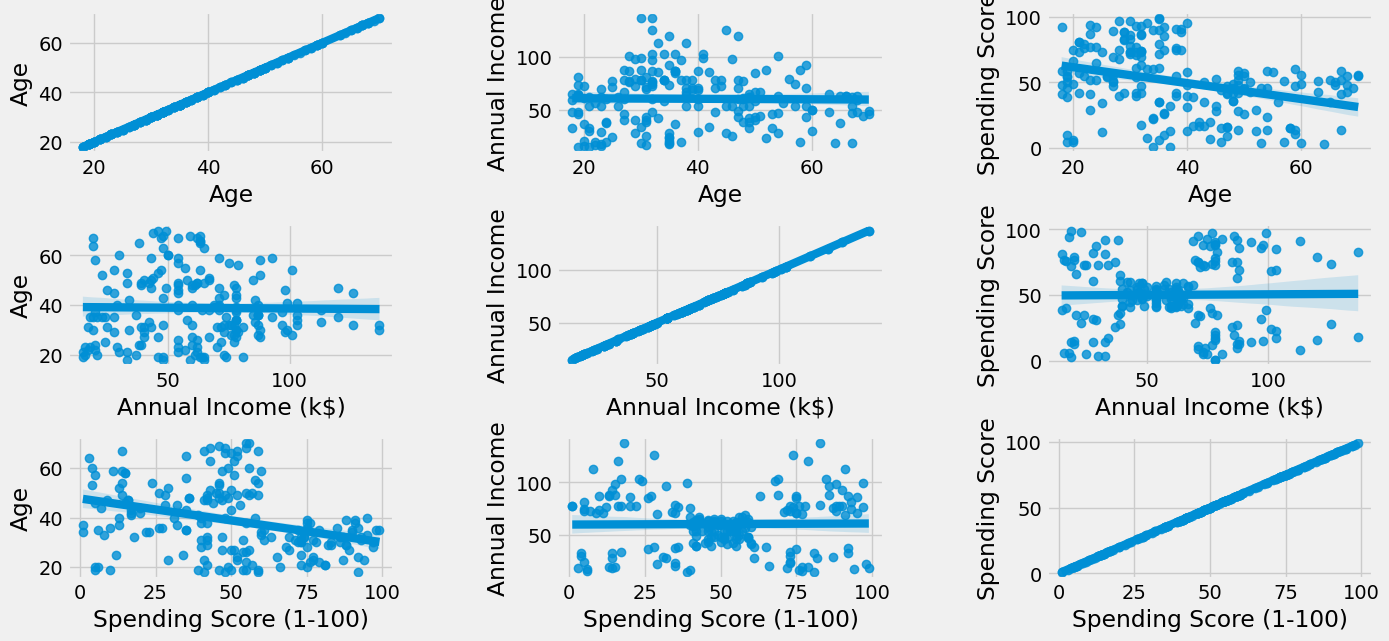

In [43]:
plt.figure(1, figsize = (15, 7))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.regplot(x = x, y = y, data = df)
    plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
plt.show()

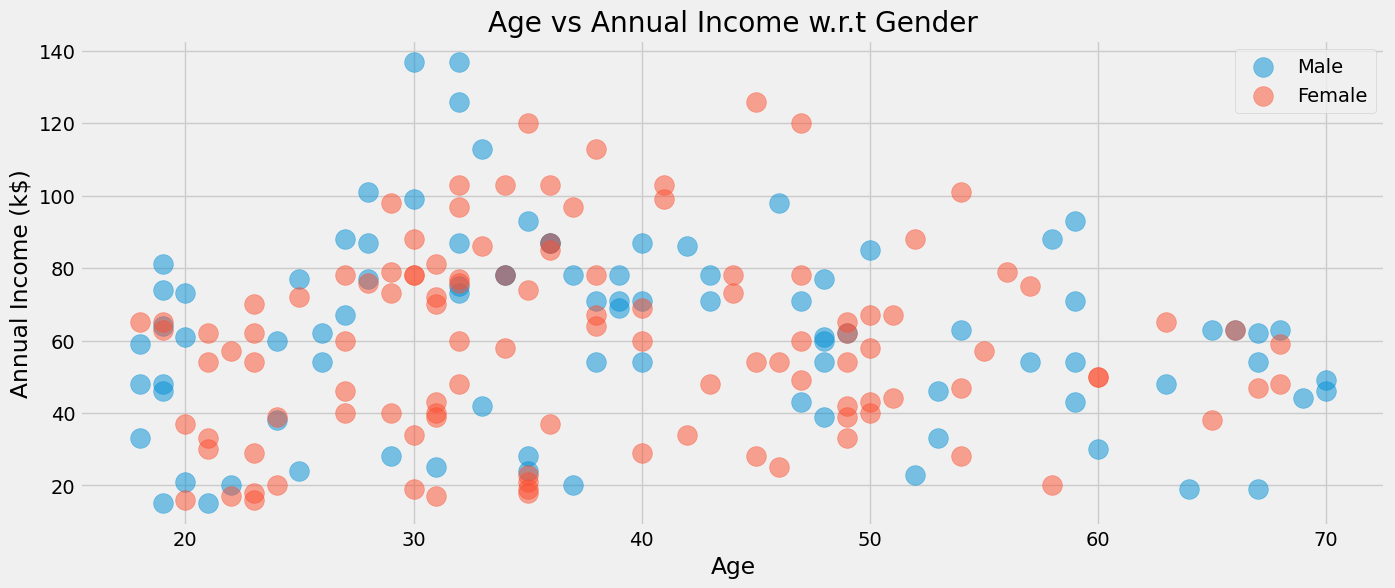

In [44]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female']:
  plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = df[df['Gender'] == gender], s = 200, alpha = 0.5, label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

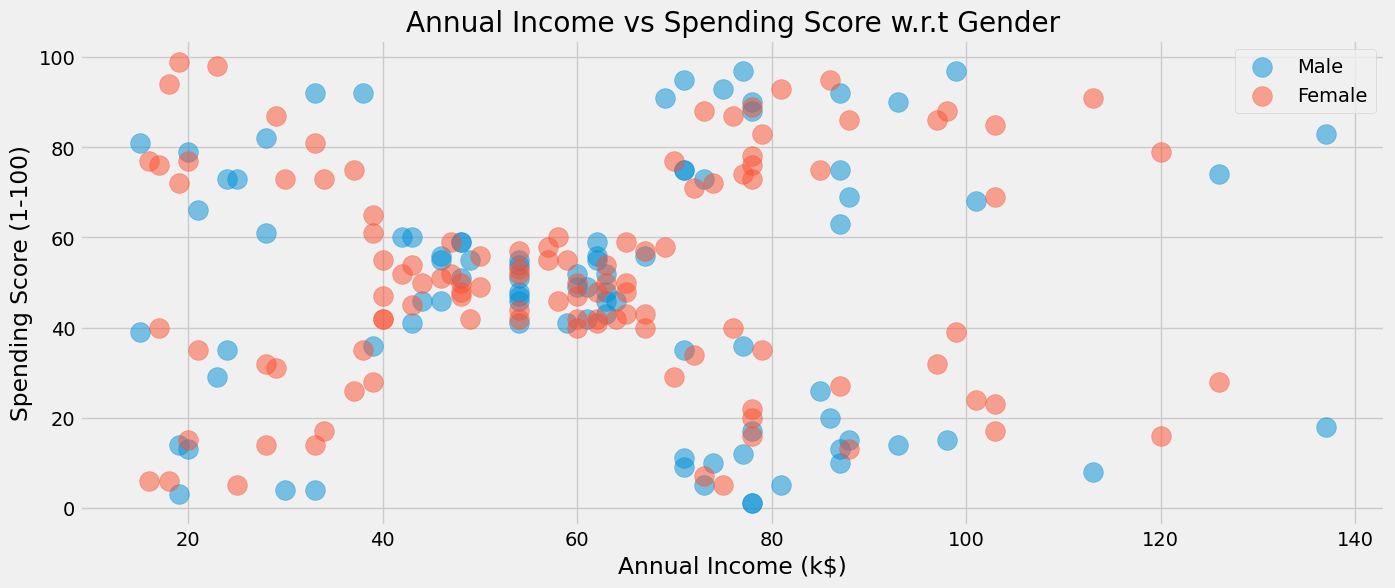

In [45]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female']:
  plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df[df['Gender'] == gender], s = 200, alpha = 0.5, label = gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

## Jinsga ko'ra yosh, yillik daromad va xarajat ballari bo'yicha qiymatlarni taqsimlash

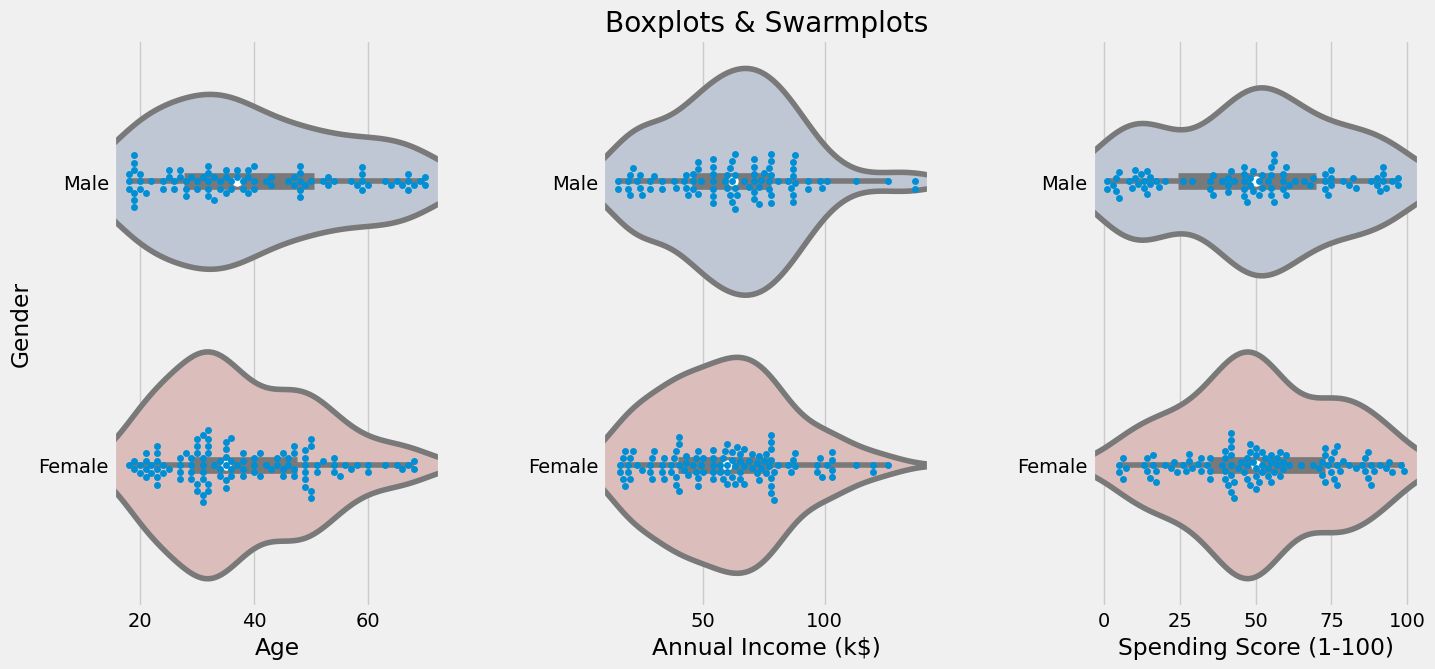

In [46]:
from seaborn.categorical import violinplot
plt.figure(1, figsize = (15, 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.violinplot(x = cols, y = 'Gender', data = df, palette = 'vlag')
  sns.swarmplot(x = cols, y = 'Gender', data = df)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## K-means algoritmidan foydalanib Klasterlash

### Yosh va xarajat ballidan foydalangan holda segmentatsiyalash

In [47]:
X1 = df[['Age', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
  algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300,
                      tol = 0.0001, random_state = 111, algorithm = 'elkan'))
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

### Inertsiyaga asoslangan N klasterlarni tanlash (Centroidlar va ma'lumotlar nuqtalari orasidagi kvadrat masofa kamroq bo'lishi kerak)

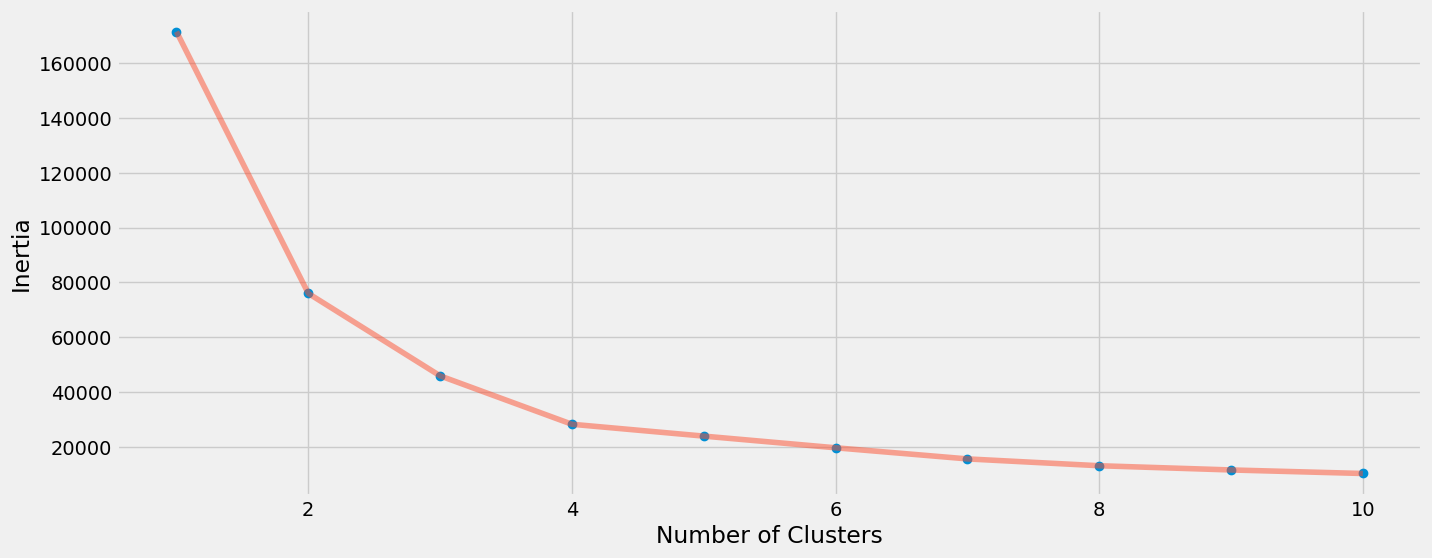

In [48]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [49]:
algorithm = (KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300,
                    tol = 0.0001, random_state = 111, algorithm = 'elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [50]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

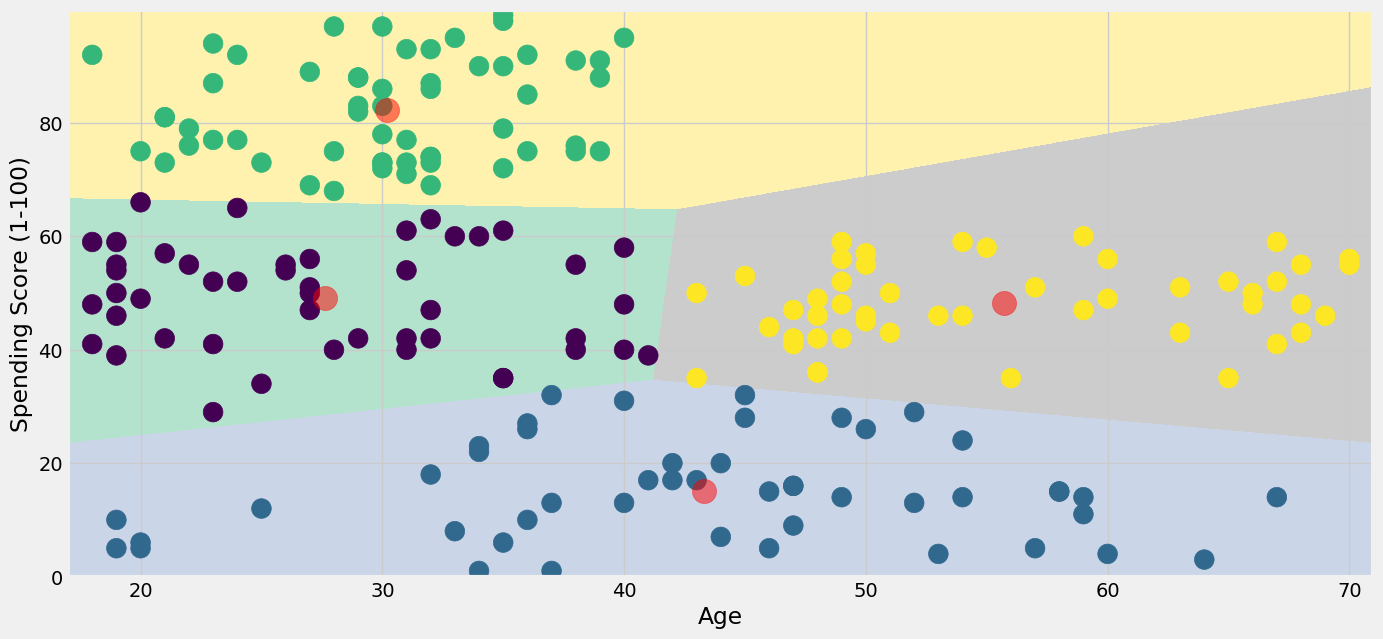

In [51]:
plt.figure(1, figsize = (15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Yillik daromad va xarajat ballidan foydalanib segmentlash

In [52]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 11):
  algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300,
                      tol = 0.0001, random_state = 111, algorithm = 'elkan'))
  algorithm.fit(X2)
  inertia.append(algorithm.inertia_)

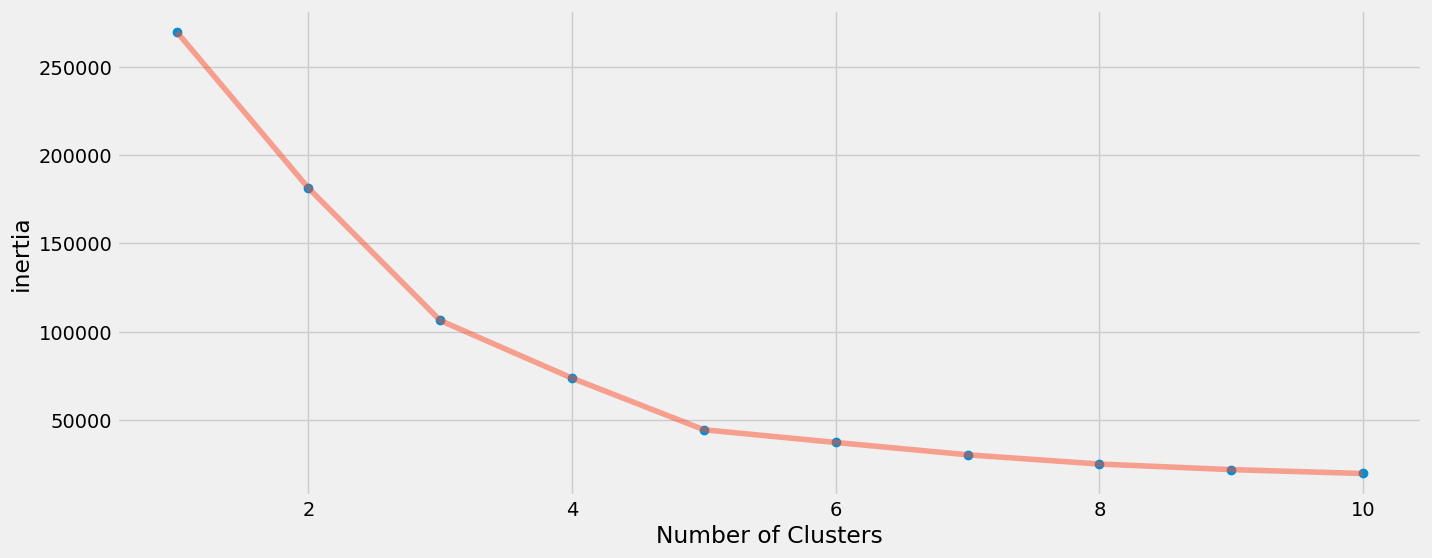

In [53]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

In [54]:
algorithm = (KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300,
                    tol = 0.0001, random_state = 111, algorithm = 'elkan'))
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [55]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

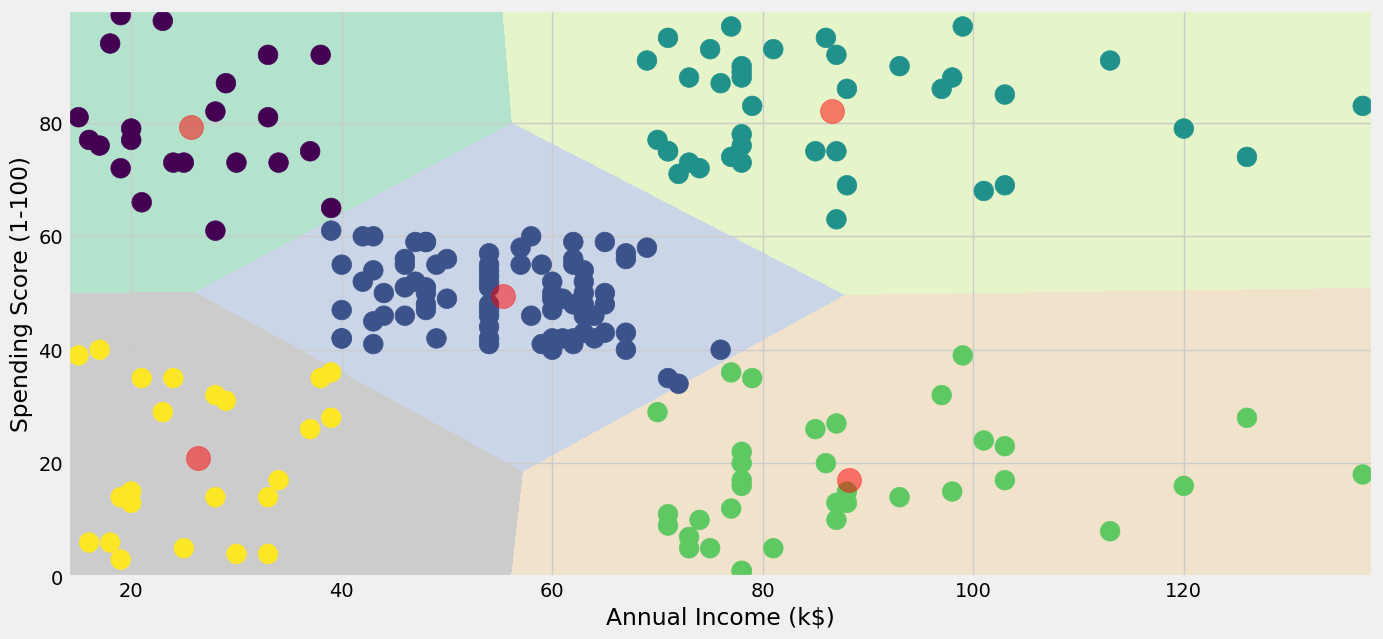

In [57]:
plt.figure(1, figsize = (15, 7))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = labels2, s = 200)
plt.scatter(x = centroids2[:, 0], y = centroids2[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Yosh, yillik daromad va xarajat ballidan foydalangan holda segmentatsiya

In [59]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 11):
  algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300,
                      tol = 0.0001, random_state = 111, algorithm = 'elkan'))
  algorithm.fit(X3)
  inertia.append(algorithm.inertia_)

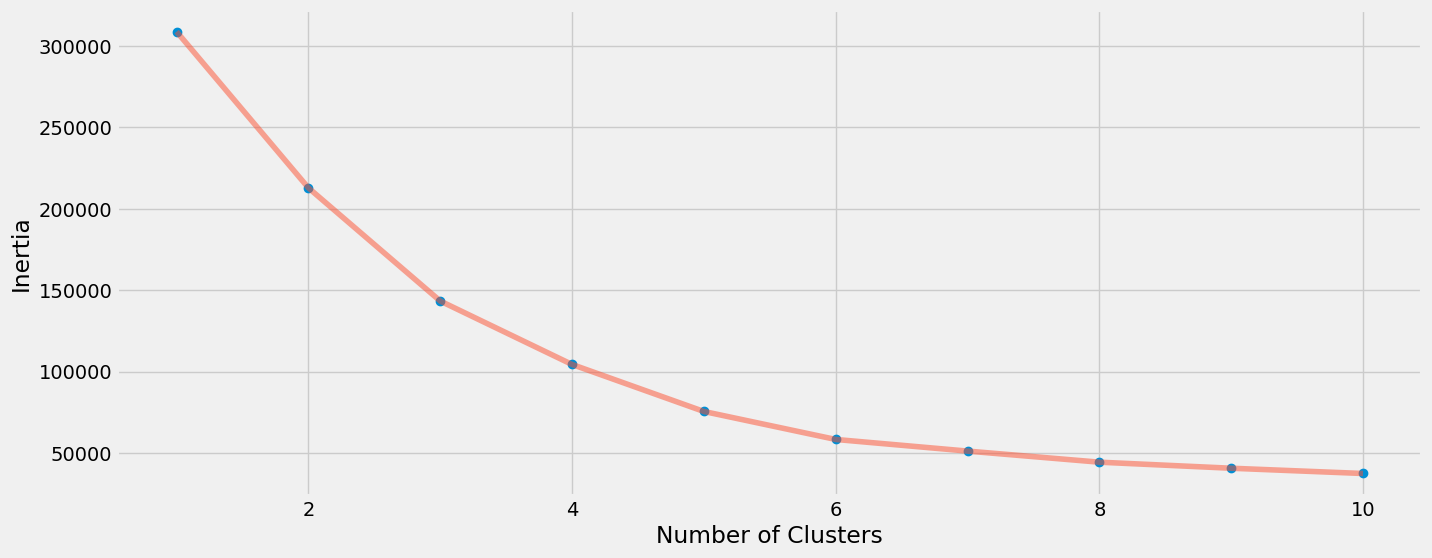

In [60]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [61]:
algorithm = (KMeans(n_clusters = 6, init = 'k-means++', n_init = 10, max_iter = 300,
                    tol = 0.0001, random_state = 111, algorithm = 'elkan'))
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [64]:
df['label3'] = labels3
trace1 = go.Scatter3d(
    x = df['Age'],
    y = df['Spending Score (1-100)'],
    z = df['Annual Income (k$)'],
    mode = 'markers',
    marker = dict(
        color = df['label3'],
        size = 20,
        line = dict(
            color = df['label3'],
            width = 12
        ),
        opacity = 0.8
    )
)
data = [trace1]
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
        xaxis = dict(title = 'Yosh'),
        yaxis = dict(title = 'Sarflash reytingi'),
        zaxis = dict(title = 'Yillik daromad')
    )
)
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)